In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import decomposition, manifold, preprocessing
from sklearn.datasets import fetch_openml, load_digits

from umap import UMAP

/Users/antonkondrahin/Library/Caches/pypoetry/virtualenvs/ml-university-FbZrr8Q1-py3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Загрузка данных

In [2]:
fmnist, fmnist_labels = fetch_openml(data_id=40996, return_X_y=True)
digits, digits_labels = load_digits(return_X_y=True)
shuttle, shuttle_labels = fetch_openml(data_id=40685, return_X_y=True)
mnist, mnist_labels = fetch_openml("mnist_784", version=1, return_X_y=True)

## Создание моделей

In [3]:
TSNE = manifold.TSNE(n_components=2)
UMAP = UMAP(n_components=2)
SVD = decomposition.TruncatedSVD(n_components=2)
PCA = decomposition.PCA(n_components=2)

## Подготовка данных

In [4]:
methods = [
    TSNE,
    UMAP,
    SVD,
    PCA,
]

datasets = [
    (fmnist, fmnist_labels),
    (mnist, mnist_labels),
    (digits, digits_labels),
    (shuttle, shuttle_labels),
]

titles = ["Fmnist", "Mnist", "Digits", "Shuttle"]

## Сравнение и изображение результатов

/Users/antonkondrahin/Library/Caches/pypoetry/virtualenvs/ml-university-FbZrr8Q1-py3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/antonkondrahin/Library/Caches/pypoetry/virtualenvs/ml-university-FbZrr8Q1-py3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/antonkondrahin/Library/Caches/pypoetry/virtualenvs/ml-university-FbZrr8Q1-py3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/antonkondrahin/Library/Caches/pypoetry/virtualenvs/ml-university-FbZrr8Q1-py3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'a

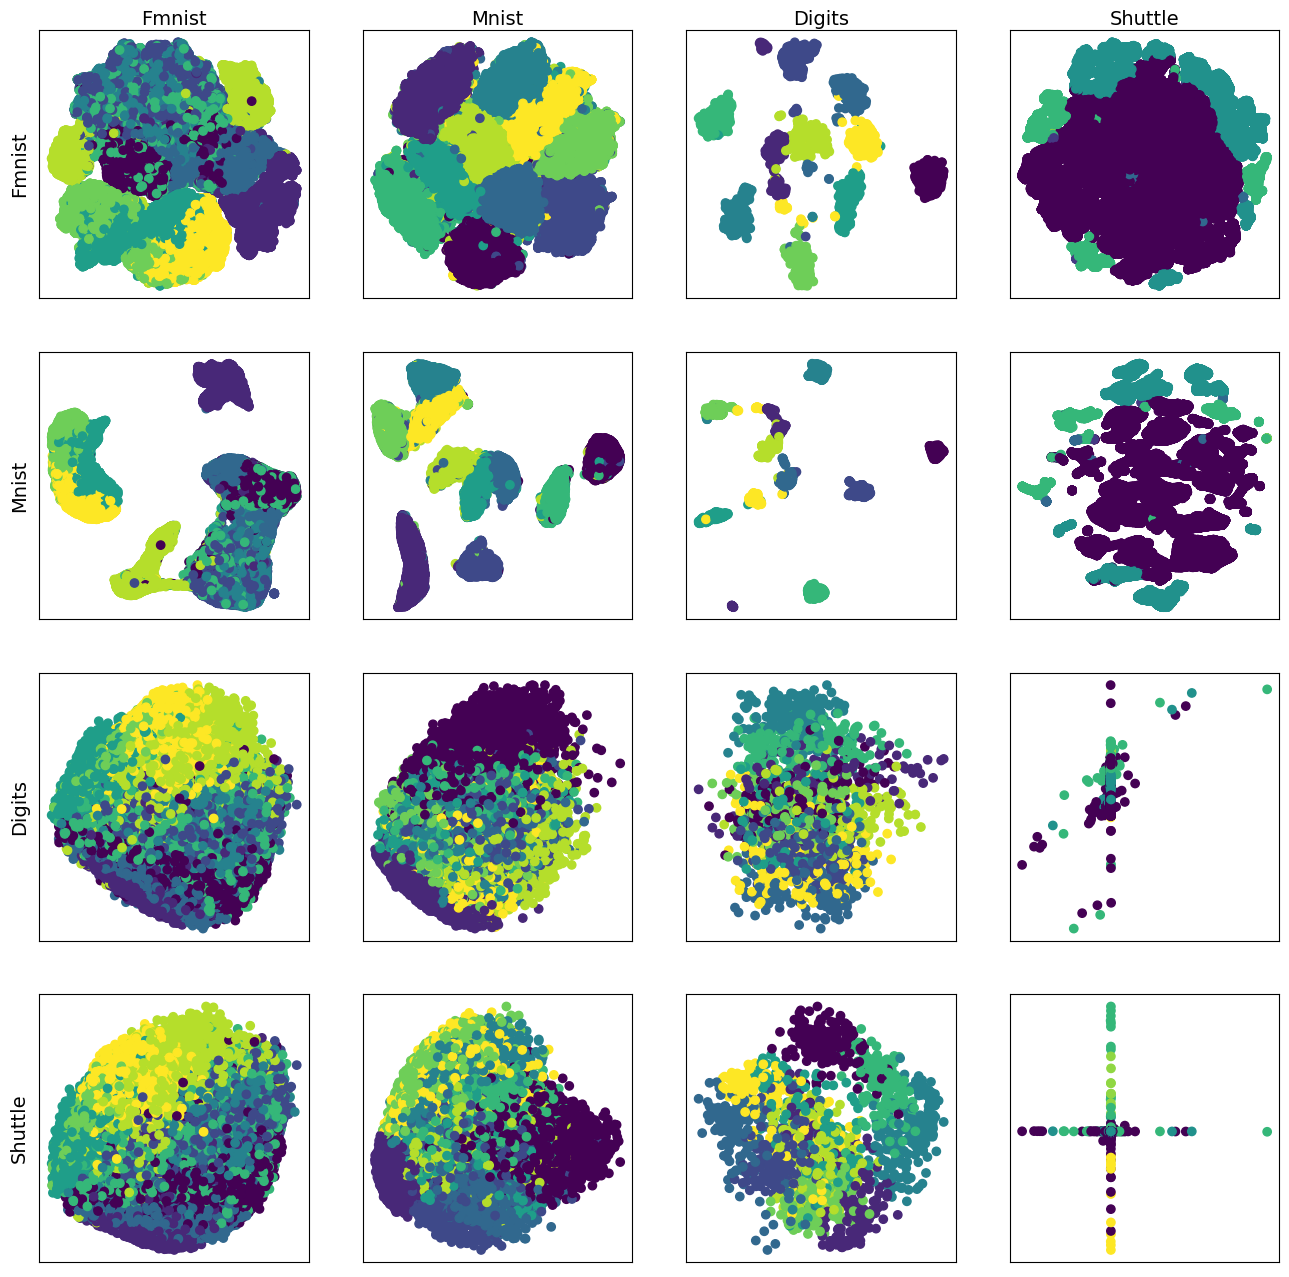

In [5]:
fig, axs = plt.subplots(4, 4, figsize=(16, 16))
for i, method in enumerate(methods):
    for j, elem in enumerate(datasets):
        if i == 0:
            axs[i, j].set_xlabel(titles[j], fontsize=14)
            axs[i, j].xaxis.set_label_position('top')
        if j == 0:
            axs[i, j].set_ylabel(titles[i], fontsize=14)

        data = elem[0]
        labels = elem[1]

        embeddings = method.fit_transform(X=data)
  
        axs[i, j].scatter(embeddings[:, 0], embeddings[:, 1], c=labels.astype(int))
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])